In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('Kwadella_winter_2013_cleaned.csv')
print df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125475 entries, 0 to 125474
Data columns (total 24 columns):
Unnamed: 0            125475 non-null int64
Dusttraks_(mg/m3)     116559 non-null float64
PM10_(ug/m3)          64669 non-null float64
PM2.5_(ug/m3)         79939 non-null float64
SO2_(ppb)             86106 non-null float64
CO_(ppm)              18618 non-null float64
NO_(ppb)              65526 non-null float64
NO2_(ppb)             65661 non-null float64
Date                  125475 non-null object
Temperature_(degC)    101947 non-null float64
H01-K-E               125288 non-null float64
H02-K-N               105235 non-null float64
H03-K-S               125304 non-null float64
H04-K-S               125275 non-null float64
H05-K-N               122834 non-null float64
H06-K-N               125353 non-null float64
H07-K-S               81779 non-null float64
H10-K-N               125297 non-null float64
H11-K-X               113919 non-null float64
H12-K-N               125

In [26]:
from datetime import datetime
def get_datetime(s):
    dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    return dt

def preprocess(df):
    res = df.copy()
    datetimes = res.Date.apply(get_datetime)
    res['Hour'] = datetimes.apply(lambda dt: dt.hour)
    res['Day'] = datetimes.apply(lambda dt: dt.day)
    res['Month'] = datetimes.apply(lambda dt: dt.month)
    res['Year'] = datetimes.apply(lambda dt: dt.year)
    return res

def daysSinceStart(df):
    #get time since epoch
    dayArray = np.array(df.Day)
    monthArray = np.array(df.Month)
    
    runningDays = []
    for day, month in zip(dayArray, monthArray):
        if month == 7:
            total_days = 0
            #do nothing, append the normal day
        elif month == 8:
            total_days = 31 
        elif month == 9:
            total_days = 61
        else:
            raise ValueError 
        total_days = total_days + day
        #print'tot days:', total_days, month, day
        runningDays.append(total_days)
    df['DayCount'] = pd.Series(runningDays, index = df.index)
    return df
        

In [27]:
df = preprocess(df)
df = daysSinceStart(df)
df.head()
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125475 entries, 0 to 125474
Data columns (total 29 columns):
Unnamed: 0            125475 non-null int64
Dusttraks_(mg/m3)     116559 non-null float64
PM10_(ug/m3)          64669 non-null float64
PM2.5_(ug/m3)         79939 non-null float64
SO2_(ppb)             86106 non-null float64
CO_(ppm)              18618 non-null float64
NO_(ppb)              65526 non-null float64
NO2_(ppb)             65661 non-null float64
Date                  125475 non-null object
Temperature_(degC)    101947 non-null float64
H01-K-E               125288 non-null float64
H02-K-N               105235 non-null float64
H03-K-S               125304 non-null float64
H04-K-S               125275 non-null float64
H05-K-N               122834 non-null float64
H06-K-N               125353 non-null float64
H07-K-S               81779 non-null float64
H10-K-N               125297 non-null float64
H11-K-X               113919 non-null float64
H12-K-N               125

In [28]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

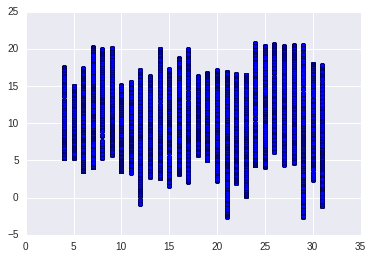

In [29]:
dfjuly = df[df['Month'] ==7]

plt.scatter(dfjuly['Day'], dfjuly['Temperature_(degC)'] )

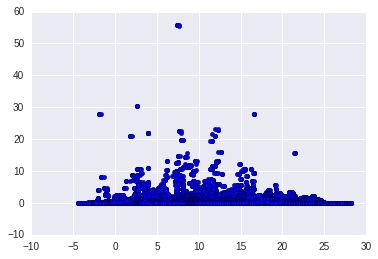

In [30]:
plt.scatter(df['Temperature_(degC)'], df['Dusttraks_(mg/m3)'])

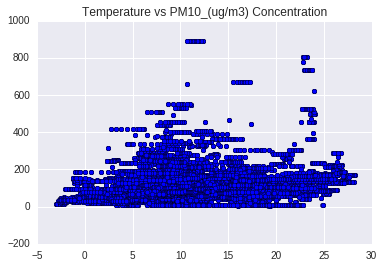

In [31]:
def scatter_temp_particles(df, dusttraks):
    plt.scatter(df['Temperature_(degC)'], df[dusttraks])
    plt.title('Temperature vs ' + dusttraks + ' Concentration' )
    
scatter_temp_particles(df, 'PM10_(ug/m3)')


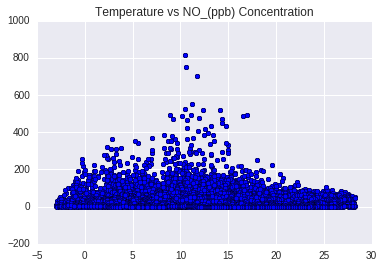

In [32]:
scatter_temp_particles(df, 'PM2.5_(ug/m3)')
scatter_temp_particles(df, 'SO2_(ppb)')
scatter_temp_particles(df, 'NO_(ppb)')
                       

In [33]:
#plt.scatter(df2['Hour'], df2['H01-K-E'])

# def getmeanfeatureforhour (hourdf, feature):
#     res = hourdf[feature].mean()
#     return res

# dfhour0 = df2[df2['Hour'] == 0]
# temp0 = getmeanfeatureforhour(dfhour0, 'H01-K-E')
# dfhour1 = df2[df2['Hour'] == 1]
# temp1= getmeanfeatureforhour(dfhour1, 'H01-K-E')
# dfhour2 = df2[df2['Hour'] == 2]
# temp2 = getmeanfeatureforhour(dfhour2, 'H01-K-E')
# dfhour3 = df2[df2['Hour'] == 3]
# temp3 = getmeanfeatureforhour(dfhour3, 'H01-K-E')
# dfhour4 = df2[df2['Hour'] == 4]
# temp4 = getmeanfeatureforhour(dfhour4, 'H01-K-E')
# dfhour5 = df2[df2['Hour'] == 5]
# temp5 = getmeanfeatureforhour(dfhour5, 'H01-K-E')
# dfhour6 = df2[df2['Hour'] == 6]
# temp6 = getmeanfeatureforhour(dfhour6, 'H01-K-E')
# dfhour7 = df2[df2['Hour'] == 7]
# temp7 = getmeanfeatureforhour(dfhour7, 'H01-K-E')
# dfhour8 = df2[df2['Hour'] == 8]
# temp8 = getmeanfeatureforhour(dfhour8, 'H01-K-E')
# dfhour9 = df2[df2['Hour'] == 9]
# temp9 = getmeanfeatureforhour(dfhour9, 'H01-K-E')
# dfhour10 = df2[df2['Hour'] == 10]
# temp10 = getmeanfeatureforhour(dfhour10, 'H01-K-E')
# dfhour11 = df2[df2['Hour'] == 11]
# temp11 = getmeanfeatureforhour(dfhour11, 'H01-K-E')
# dfhour12 = df2[df2['Hour'] == 12]
# temp12 = getmeanfeatureforhour(dfhour12, 'H01-K-E')
# dfhour13 = df2[df2['Hour'] == 13]
# temp13 = getmeanfeatureforhour(dfhour13, 'H01-K-E')
# dfhour14 = df2[df2['Hour'] == 14]
# temp14 = getmeanfeatureforhour(dfhour14, 'H01-K-E')
# dfhour15 = df2[df2['Hour'] == 15]
# temp15 = getmeanfeatureforhour(dfhour15, 'H01-K-E')
# dfhour16 = df2[df2['Hour'] == 16]
# temp16 = getmeanfeatureforhour(dfhour16, 'H01-K-E')
# dfhour17 = df2[df2['Hour'] == 17]
# temp17 = getmeanfeatureforhour(dfhour17, 'H01-K-E')
# dfhour18 = df2[df2['Hour'] == 18]
# temp18 = getmeanfeatureforhour(dfhour18, 'H01-K-E')
# dfhour19 = df2[df2['Hour'] == 19]
# temp19 = getmeanfeatureforhour(dfhour19, 'H01-K-E')
# dfhour20 = df2[df2['Hour'] == 20]
# temp20 = getmeanfeatureforhour(dfhour20, 'H01-K-E')
# dfhour21 = df2[df2['Hour'] == 21]
# temp21 = getmeanfeatureforhour(dfhour21, 'H01-K-E')
# dfhour22 = df2[df2['Hour'] == 22]
# temp22 = getmeanfeatureforhour(dfhour22, 'H01-K-E')
# dfhour23 = df2[df2['Hour'] == 23]
# temp23 = getmeanfeatureforhour(dfhour23, 'H01-K-E')

# hourlist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
# templist = [temp0,temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9,temp10,temp11,temp12,temp13,temp14,temp15,temp16,temp17,temp18,temp19,temp20,temp21,temp22,temp23]


# #TODO: MAKE INTO FUNCTION^

# plt.plot(hourlist, templist)



In [34]:

def getmeanfeatureforhour (hourdf, feature):
    res = hourdf[feature].mean()
    return res
def featurehourplot(df, feature):
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = getmeanfeatureforhour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= getmeanfeatureforhour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = getmeanfeatureforhour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = getmeanfeatureforhour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = getmeanfeatureforhour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = getmeanfeatureforhour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = getmeanfeatureforhour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = getmeanfeatureforhour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = getmeanfeatureforhour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = getmeanfeatureforhour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = getmeanfeatureforhour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = getmeanfeatureforhour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = getmeanfeatureforhour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = getmeanfeatureforhour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = getmeanfeatureforhour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = getmeanfeatureforhour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = getmeanfeatureforhour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = getmeanfeatureforhour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = getmeanfeatureforhour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = getmeanfeatureforhour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = getmeanfeatureforhour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = getmeanfeatureforhour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = getmeanfeatureforhour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = getmeanfeatureforhour(dfhour23, feature)

    hourlist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    plt.plot(hourlist, featlist)
    plt.legend(feature)
    plt.xlabel('Hour')
    if feature[0:1] == 'H0':
        plt.ylabel('House Temp, Degrees C')
    else:
        plt.ylabel(feature)
    plt.title('Average ' + feature + ' for each hour of day')



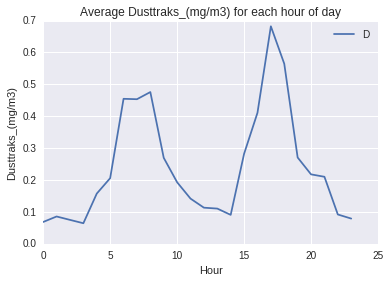

In [35]:
featurehourplot(df, 'Dusttraks_(mg/m3)')

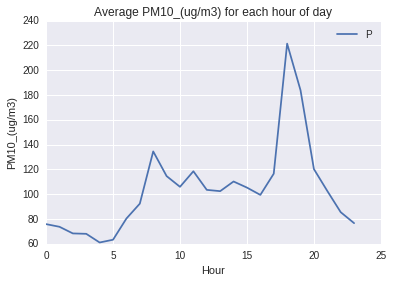

In [36]:
featurehourplot(df, 'PM10_(ug/m3)')


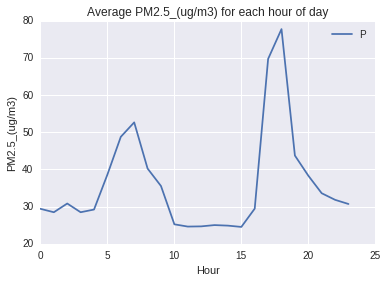

In [37]:
featurehourplot(df, 'PM2.5_(ug/m3)')

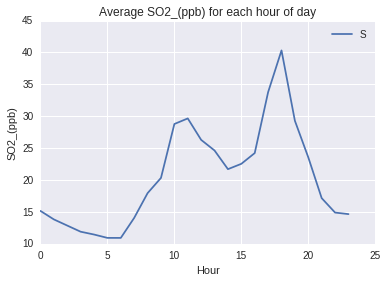

In [38]:
featurehourplot(df, 'SO2_(ppb)')

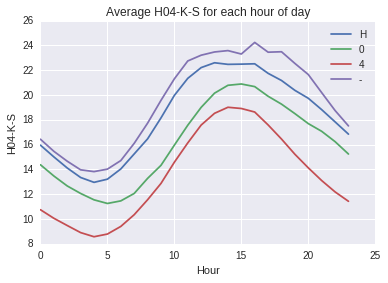

In [39]:
featurehourplot(df, 'H01-K-E')
featurehourplot(df, 'H02-K-N')
featurehourplot(df, 'H03-K-S')
featurehourplot(df, 'H04-K-S')

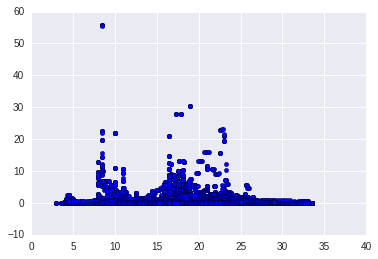

In [40]:
plt.scatter(df['H01-K-E'], df['Dusttraks_(mg/m3)'])

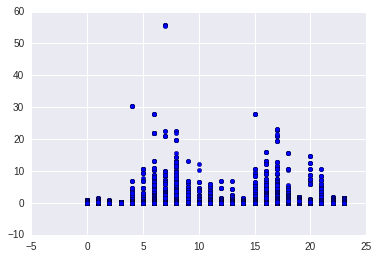

In [41]:
plt.scatter(df['Hour'], df['Dusttraks_(mg/m3)'])

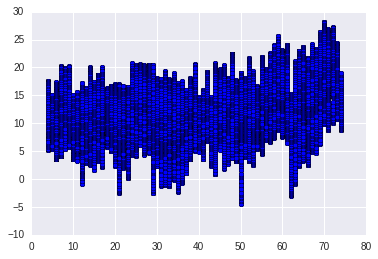

In [43]:
plt.scatter(df['DayCount'], df['Temperature_(degC)'])

In [57]:
def compute_avg_temp(df):
    df['DailyAverageTemp'] = df['Temperature_(degC)'].mean()
    return df

grouped = df.groupby('DayCount')
df = grouped.apply(compute_avg_temp)

In [ ]:
def compute_avg_temp(df):
    df['DailyAverageTemp'] = df['Temperature_(degC)'].mean()
    return df

grouped = df.groupby('DayCount')
df = grouped.apply(compute_avg_temp)

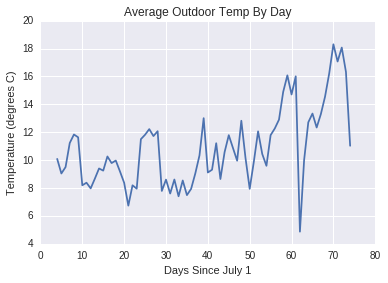

In [60]:
plt.plot(df['DayCount'], df['DailyAverageTemp'])
plt.title('Average Outdoor Temp By Day')
plt.xlabel('Days Since July 1')
plt.ylabel('Temperature (degrees C)')